In [ ]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.probability import FreqDist




from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import string
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/summarization/news_summary.csv'
path_1='/content/drive/MyDrive/Colab Notebooks/summarization/news_summary_more.csv'

In [ ]:
summary = pd.read_csv(path, encoding='iso-8859-1')

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving news_summary_more.csv to news_summary_more.csv


In [ ]:
raw = pd.read_csv('news_summary_more.csv' ,encoding='iso-8859-1')

In [ ]:
summary.head()

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...


In [ ]:
raw.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [ ]:
data1 =  raw.iloc[:,0:2].copy()
data2 = summary.iloc[:,0:6].copy()
data2['text'] = data2['author'].str.cat(data2['date'].str.cat(data2['read_more'].str.cat(data2['text'].str.cat(data2['ctext'], sep = " "), sep =" "),sep= " "), sep = " ")


In [ ]:
data1.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [ ]:
data = pd.DataFrame()
data['text'] = pd.concat([data1['text'], data2['text']], ignore_index=True)
data['summary'] = pd.concat([data1['headlines'],data2['headlines']],ignore_index = True)

In [ ]:
data.head()

,text,summary
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's...",upGrad learner switches to career in ML & Al w...
1,Kunal Shah's credit card bill payment platform...,Delhi techie wins free food from Swiggy for on...
2,New Zealand defeated India by 8 wickets in the...,New Zealand end Rohit Sharma-led India's 12-ma...
3,"With Aegon Life iTerm Insurance plan, customer...",Aegon life iTerm insurance plan helps customer...
4,Speaking about the sexual harassment allegatio...,"Have known Hirani for yrs, what if MeToo claim..."


In [ ]:
data.shape

(102915, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102915 entries, 0 to 102914
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   text     102797 non-null  object
 1   summary  102915 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [ ]:
data.isnull().sum()

text       118
summary      0
dtype: int64

In [ ]:
df = data.dropna(axis = 0, how ='any') 

In [ ]:
df.isnull().sum()

text       0
summary    0
dtype: int64

In [ ]:
print(len(df[df["text"].duplicated()]))
print(len(df[df["summary"].duplicated()]))

41
2952


In [ ]:
df1 = df.drop_duplicates(subset=['text'])
df2 = df1.drop_duplicates(subset=['summary'])
print(len(df1[df1["text"].duplicated()]))
print(len(df2[df2["summary"].duplicated()]))

0
0


In [ ]:
df2.reset_index(drop=True, inplace=True)

In [ ]:
df2

,text,summary
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's...",upGrad learner switches to career in ML & Al w...
1,Kunal Shah's credit card bill payment platform...,Delhi techie wins free food from Swiggy for on...
2,New Zealand defeated India by 8 wickets in the...,New Zealand end Rohit Sharma-led India's 12-ma...
3,"With Aegon Life iTerm Insurance plan, customer...",Aegon life iTerm insurance plan helps customer...
4,Speaking about the sexual harassment allegatio...,"Have known Hirani for yrs, what if MeToo claim..."
...,...,...
99822,"Tarun Khanna 24 Feb 2017,Friday http://indiato...",Prosthetic fingers on sale to rig UP election:...
99823,"Daisy Mowke 24 Feb 2017,Friday http://indiatod...","Kangana, Shahid, Saif starrer 'Rangoon' hits t..."
99824,"Tarun Khanna 24 Feb 2017,Friday http://indiato...",BMC Mayor will be from Shiv Sena: Uddhav Thack...
99825,"Mansha Mahajan 24 Feb 2017,Friday http://india...",Rasna seeking ?250 cr revenue from snack categ...


In [ ]:
print(df2.shape)
print(df2.info())

(99827, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99827 entries, 0 to 99826
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     99827 non-null  object
 1   summary  99827 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB
None


In [ ]:
data = df2['text']
data = pd.DataFrame(data)
print(data.head())

                                                text
0  Saurav Kant, an alumnus of upGrad and IIIT-B's...
1  Kunal Shah's credit card bill payment platform...
2  New Zealand defeated India by 8 wickets in the...
3  With Aegon Life iTerm Insurance plan, customer...
4  Speaking about the sexual harassment allegatio...


In [ ]:
print(data['text'][1000])

On being asked about sunstrike break in the first New Zealand-India ODI, India captain Virat Kohli said, "I had never experienced it in my life [before]." "I actually got out in a game in 2014 because the sun was in my eyes. This rule [play stopping because of sun] wasn't there then. I'm glad there's a rule now," Kohli added.


In [ ]:
#convert to lower
data['text'] = data['text'].str.lower()

In [ ]:
#remove punctuations
def remove_punct(text):
  for punctuation in string.punctuation:
    text = text.replace(punctuation,'')
  return text
data['text'] = data['text'].apply(remove_punct)


In [ ]:
# remove url
def remove_url(text):
  text = re.sub(r'http\S+', '', text)
  re.sub(r'[0-9]', '_', text)
  return text
data['text'] = data['text'].apply(remove_url)

In [ ]:
# remove the special char
def remove_special_char(text):
  text = re.sub('[^a-zA-z0-9\s]','',text)
  return text
data['text'] = data['text'].apply(remove_special_char)

  

In [ ]:
# list of stop words
stopwords = stopwords.words("english")
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:

# remove stopwords
def rm_stopwords(text):
    text = text.split()
    word_list = []
    for i in text:
        if i not in stopwords:
            word_list.append(i)
    return ' '.join(word_list)
data['text'] = data['text'].apply(rm_stopwords)

In [ ]:
#words tokenization
data['tokens'] = data['text'].apply(word_tokenize)


In [ ]:
print(data.head())

                                                text  \
0  saurav kant alumnus upgrad iiitbs pg program m...   
1  kunal shahs credit card bill payment platform ...   
2  new zealand defeated india 8 wickets fourth od...   
3  aegon life iterm insurance plan customers enjo...   
4  speaking sexual harassment allegations rajkuma...   

                                              tokens  
0  [saurav, kant, alumnus, upgrad, iiitbs, pg, pr...  
1  [kunal, shahs, credit, card, bill, payment, pl...  
2  [new, zealand, defeated, india, 8, wickets, fo...  
3  [aegon, life, iterm, insurance, plan, customer...  
4  [speaking, sexual, harassment, allegations, ra...  


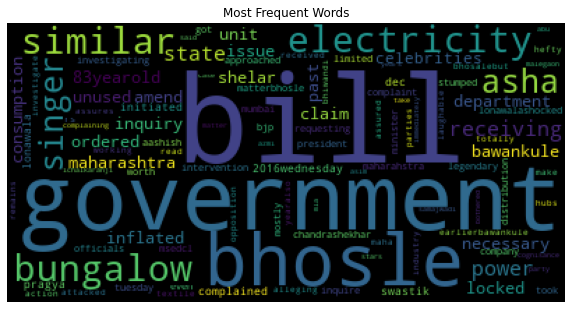

In [ ]:
for i in range(len(data['text'])):
  text = data['text'][i]
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud.recolor(random_state=2017))
plt.title('Most Frequent Words')
plt.axis("off")
plt.show()

In [ ]:
print(data)

                                                    text  \
0      saurav kant alumnus upgrad iiitbs pg program m...   
1      kunal shahs credit card bill payment platform ...   
2      new zealand defeated india 8 wickets fourth od...   
3      aegon life iterm insurance plan customers enjo...   
4      speaking sexual harassment allegations rajkuma...   
...                                                  ...   
99822  tarun khanna 24 feb 2017friday investigation i...   
99823  daisy mowke 24 feb 2017friday kangana ranaut s...   
99824  tarun khanna 24 feb 2017friday emerging single...   
99825  mansha mahajan 24 feb 2017friday fruit juice c...   
99826  pragya swastik 07 dec 2016wednesday maharashtr...   

                                                  tokens  
0      [saurav, kant, alumnus, upgrad, iiitbs, pg, pr...  
1      [kunal, shahs, credit, card, bill, payment, pl...  
2      [new, zealand, defeated, india, 8, wickets, fo...  
3      [aegon, life, iterm, insurance, plan

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
data['lemmatized'] = data.text.apply(lemmatize_text)

In [ ]:
dim = len(data)
text = data['lemmatized'].copy()
txt = data['lemmatized'].copy()
for i in range(dim):
  txt[i]=" ".join(text[i])

In [ ]:
print(txt[10])
print(txt[100])

two minor cousin uttar pradeshs gorakhpur allegedly repeatedly burnt tongs forced eat human excreta family friend two boy school cousin revealed ordeal police child welfare committee brought back gorakhpur nepal fled escape torture
german multinational engineering electronics firm bosch made first investment india bengalurubased deeptech startup simyog simyog raised 63 crore funding round participation earlystage venture capital firm ideaspring capital incubated indian institute science iisc provides design signoff tool automotive electronics


In [ ]:
clean_data = pd.DataFrame(txt)
clean_data['text'] = clean_data['lemmatized']
clean_data = clean_data['text']
clean_data = pd.DataFrame(clean_data)
print(type(clean_data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
clean_data

,text
0,saurav kant alumnus upgrad iiitbs pg program m...
1,kunal shah credit card bill payment platform c...
2,new zealand defeated india 8 wicket fourth odi...
3,aegon life iterm insurance plan customer enjoy...
4,speaking sexual harassment allegation rajkumar...
...,...
99822,tarun khanna 24 feb 2017friday investigation i...
99823,daisy mowke 24 feb 2017friday kangana ranaut s...
99824,tarun khanna 24 feb 2017friday emerging single...
99825,mansha mahajan 24 feb 2017friday fruit juice c...


In [ ]:
docs = clean_data['text']

In [ ]:
docs[1][0:103]

'kunal shah credit card bill payment platform cred gave user chance win free food swiggy one year pranav'

CountVectorizer to create a vocabulary and generate word counts

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#docs = docs.tolist()
#create a vocabulary of words, 
cv=CountVectorizer(max_df=0.95,                                       # ignore words that appear in 95% of documents
                   max_features=10000,                                 # the size of the vocabulary
                   ngram_range=(1,3)                                   # vocabulary contains single words, bigrams, trigrams
                  )
word_count_vector=cv.fit_transform(docs)

In [ ]:
word_count_vector

<99827x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 3228862 stored elements in Compressed Sparse Row format>

TfidfTransformer to Compute Inverse Document Frequency (IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

Once we have our IDF computed, we are now ready to compute TF-IDF and extract the top keywords.

In [ ]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []

    for idx, score in sorted_items:
        fname = feature_names[idx]
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [ ]:
# get feature names
feature_names=cv.get_feature_names()

def get_keywords(idx, docs):

    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([docs[idx]]))

    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    #extract only the top n; n here is 10
    keywords=extract_topn_from_vector(feature_names,sorted_items,10)
    
    return keywords

def print_results(idx,keywords, clean_data):
    # now print the results
    print("\n=====text=====")
    print(clean_data['text'][idx])
    print("\n===Keywords===")
    for k in keywords:
        print(k,keywords[k])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
idx=941
keywords=get_keywords(idx, docs)
print_results(idx,keywords, clean_data)


=====text=====
apple fired 200 employee working secretive selfdriving car division codenamed project titan company spokesperson confirmed additionally employee previously working project titan transferred division august 2018 apple hired tesla former senior engineering vice president doug field head project titan

===Keywords===
project 0.399
division 0.352
apple 0.279
employee 0.255
working 0.252
additionally 0.206
selfdriving car 0.19
selfdriving 0.177
hired 0.175
transferred 0.175


I am not happy with result. I would like to add a filter that will remove similar keywords, or short keywords inside of complex ones. For instance, non-negative matrix factorization meets us 5 time: non negative matrix, negative matrix, nmf, matrix factorization, matrix. Adding a 4-grams does not change the situation. Similar keywords appears due to the fact that TF-IDF does not take into account the context, the keywords importance comes only from their frequencies relationship. Thus, TF-IDF is a quick, intuitive, but not the best way to extract keywords from the text. Let's look at other ways.

In [ ]:
import gensim
text = "Non-negative matrix factorization (NMF) has previously been shown to " + \
"be a useful decomposition for multivariate data. Two different multiplicative " + \
"algorithms for NMF are analyzed. They differ only slightly in the " + \
"multiplicative factor used in the update rules. One algorithm can be shown to " + \
"minimize the conventional least squares error while the other minimizes the  " + \
"generalized Kullback-Leibler divergence. The monotonic convergence of both  " + \
"algorithms can be proven using an auxiliary function analogous to that used " + \
"for proving convergence of the Expectation-Maximization algorithm. The algorithms  "
print(text)

Non-negative matrix factorization (NMF) has previously been shown to be a useful decomposition for multivariate data. Two different multiplicative algorithms for NMF are analyzed. They differ only slightly in the multiplicative factor used in the update rules. One algorithm can be shown to minimize the conventional least squares error while the other minimizes the  generalized Kullback-Leibler divergence. The monotonic convergence of both  algorithms can be proven using an auxiliary function analogous to that used for proving convergence of the Expectation-Maximization algorithm. The algorithms  


In [ ]:
def get_keywords_gensim(idx, docs):
    
    keywords=gensim.summarization.keywords(docs[idx], 
                                  ratio=None, 
                                  words=10,         
                                  split=True,             
                                  scores=False,           
                                  pos_filter=None, 
                                  lemmatize=True,         
                                  deacc=True)              
    
    return keywords

In [ ]:
print("SUMMARY: ", gensim.summarization.summarize(text,ratio = 0.5,split = True))

SUMMARY:  ['Non-negative matrix factorization (NMF) has previously been shown to be a useful decomposition for multivariate data.', 'Two different multiplicative algorithms for NMF are analyzed.', 'They differ only slightly in the multiplicative factor used in the update rules.']


In [ ]:
def print_results_gensim(idx,keywords, clean_data):
    # now print the results
    print("\n=====text=====")
    print(clean_data['text'][idx])
    print("\n===Keywords===")
    for k in keywords:
        print(k)

In [ ]:
idx=941
keywords=get_keywords_gensim(idx, docs)
print_results_gensim(idx,keywords, clean_data)


=====text=====
apple fired 200 employee working secretive selfdriving car division codenamed project titan company spokesperson confirmed additionally employee previously working project titan transferred division august 2018 apple hired tesla former senior engineering vice president doug field head project titan

===Keywords===
division
employee working
project titan
apple
engineering vice president
hired


Conclusion
In this kernel, we looked at different algorithms of keywords extraction. My personal top is:
TextRank by gensim